<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/0716_Cabbage_predict_good_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

In [366]:
if os.path.isfile("Cabbage.xlsx") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/Yi-Wei-Lin/dataset/Cabbage.xlsx"

if os.path.isfile("reportdaily_mean_fillna.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv"

if os.path.isfile("TyphoonDatabase.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv"

In [367]:
# data = pd.read_excel("Cabbage.xlsx")
data = pd.read_excel("Cabbage.xlsx")

In [368]:
data = data.dropna()
data = data.loc[data["Market"] == "台北一"]
np.array(data["Avg_price"]).reshape(-1,1)

array([[ 8.9],
       [ 7.2],
       [ 6.7],
       ...,
       [15.1],
       [15.1],
       [15.5]])

In [369]:
# data_train = data[data["Date"] < "2020-06-01"]
# data_test = data[data["Date"] >= "2020-06-01"]
# data = data_train
data = data.reset_index()
data

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Volume,Month,Week_day,Year,Rest_day
0,39204,2000-01-02,台北一,LA1 甘藍 初秋,11.0,8.0,5.0,8.9,192029.0,1,7,2000,0
1,39205,2000-01-03,台北一,LA1 甘藍 初秋,9.0,7.0,4.0,7.2,174270.0,1,1,2000,0
2,39206,2000-01-04,台北一,LA1 甘藍 初秋,8.0,6.0,3.0,6.7,125426.0,1,2,2000,0
3,39207,2000-01-05,台北一,LA1 甘藍 初秋,10.0,7.0,4.0,7.1,119318.0,1,3,2000,0
4,39208,2000-01-06,台北一,LA1 甘藍 初秋,9.0,7.0,5.0,6.8,118178.0,1,4,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,47037,2021-06-13,台北一,LA1 甘藍 初秋,23.0,15.6,6.2,15.2,174973.0,6,7,2021,0
6498,47038,2021-06-14,台北一,LA1 甘藍 初秋,27.4,21.4,13.6,21.0,128693.0,6,1,2021,0
6499,47041,2021-06-17,台北一,LA1 甘藍 初秋,21.8,15.0,8.5,15.1,96289.0,6,4,2021,0
6500,47042,2021-06-18,台北一,LA1 甘藍 初秋,21.9,15.2,8.1,15.1,148701.0,6,5,2021,0


In [370]:
# data_dum = pd.get_dummies(data)
# pd.DataFrame(data_dum)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Month"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Month_")
data = data.join(month, how="left")
# df.loc[df['city'] == '基隆市'].add_suffix('_' + 'KLU')
# df.rename(columns={'舊欄位名稱': '新欄位名稱'}) .add_prefix("Month_")

In [371]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Week_day"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Week_day_")
data = data.join(month, how="left")

In [372]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Year"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + data["Year"].iloc[0]
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Year_")
data = data.join(month, how="left")

In [373]:
data_train = data

In [374]:
data_train = data_train.drop(["Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_train

,index,Up_price,Mid_price,Low_price,Avg_price,Volume,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,39204,11.0,8.0,5.0,8.9,192029.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39205,9.0,7.0,4.0,7.2,174270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39206,8.0,6.0,3.0,6.7,125426.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39207,10.0,7.0,4.0,7.1,119318.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39208,9.0,7.0,5.0,6.8,118178.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,47037,23.0,15.6,6.2,15.2,174973.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6498,47038,27.4,21.4,13.6,21.0,128693.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6499,47041,21.8,15.0,8.5,15.1,96289.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6500,47042,21.9,15.2,8.1,15.1,148701.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [375]:
# from tensorflow.keras.utils import to_categorical
# pd.DataFrame(to_categorical(data_train["Month"]))
feature = data_train.shape[1]
print(feature)

47


In [376]:
# preparing label data
past = 15
day = 7
Cabbage_shift = data_train.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_train = data_train.drop(data_train.index[len(data_train)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x, y = data_train.values, label.values

In [377]:
data_train.head(10)

,index,Up_price,Mid_price,Low_price,Avg_price,Volume,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,39204,11.0,8.0,5.0,8.9,192029.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39205,9.0,7.0,4.0,7.2,174270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39206,8.0,6.0,3.0,6.7,125426.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39207,10.0,7.0,4.0,7.1,119318.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39208,9.0,7.0,5.0,6.8,118178.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,39209,9.0,7.0,4.0,7.3,120262.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,39210,9.0,7.0,5.0,7.2,165885.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,39212,7.0,5.0,3.0,5.4,197586.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,39213,7.0,5.0,3.0,5.5,156800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,39214,6.0,4.5,3.0,4.8,128598.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
X = []
for i in range(len(data_train)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_train.iloc[i+d])
  X.append(xx)
X = np.array(X)
x = X
y = y[past-1:-day]

In [379]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [380]:
x_test.reshape(-1,feature).shape
test_date = pd.DataFrame(x_test.reshape(-1,feature))[0]

In [381]:
# x_train = x_train[:,1:]
# x_test = x_test[:,1:]

In [382]:
x_shape = x_train.shape[0]
x_train = x_train.reshape(-1,feature)

In [383]:
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()
x_train = Xscaler.fit_transform(x_train)
y_train = Yscaler.fit_transform(y_train.reshape(-1,1))

In [384]:
x_train.shape

(87390, 47)

In [385]:
# splitting train and test
# x_train = x_train.reshape((-1,1,5))
x_train = x_train.reshape((-1,past,feature))
x_test = x_test.reshape((-1,past,feature))

In [386]:
# data_train = np.concatenate((data_xtrain, data_ytrain), axis=1)


In [387]:
# x_train = []
# y_train = []
# time_step = 60
# for i in range(len(data_train) - time_step):
#   x_train.append(data_train[i:(i+time_step)])
#   y_train.append(data_train[(i+time_step)][-1])
# x_train, y_train = np.array(x_train), np.array(y_train).reshape(-1,1)

In [388]:
# Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
layers = [
    LSTM(units=32, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # LSTM(units=256, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=256, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=256),
    # Dropout(0.2),
    # Dense(units=5, activation="sigmoid"),
    Dense(units=1, activation="linear")
]
regressor = Sequential(layers)
regressor.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 32)                10240     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 10,273
Trainable params: 10,273
Non-trainable params: 0
_________________________________________________________________


In [389]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ModelCheckpoint
regressor.compile(loss = "mse",
         optimizer = Adam(),
         metrics=["mse"]                   
)
callback = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("regressor.h5", save_best_only=True)
]
regressor.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=callback)
# regressor.fit(x_train, y_train, epochs=40, batch_size=40, validation_split=0.1)

Epoch 1/100
164/164 [==============================] - 4s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2/100
164/164 [==============================] - 2s 11ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 3/100
164/164 [==============================] - 2s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/100
164/164 [==============================] - 2s 10ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5/100
164/164 [==============================] - 2s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6/100
164/164 [==============================] - 1s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/100
164/164 [==============================] - 1s 9ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 8/100
164/164 [==============================] - 2s 10ms/st

In [390]:
# plt.plot(regressor.regressor['loss'], color = 'red')
# plt.plot(regressor.regressor['val_loss'], color = 'bule')

In [391]:
# past_60_days = data[data["Date"] < "2019-01-01"].tail(time_step)
# df = past_60_days.append(data_test, ignore_index = True)
# df = df.drop(["Date", "Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
# df

In [392]:
# real_avg_price = np.array(df.iloc[time_step:]["Avg_price"]).reshape(-1,1)
# ytest = np.array(df["Avg_price"]).reshape(-1,1)
# x_inputs = Xscaler.transform(df.drop(["Avg_price"], axis=1))
# y_inputs = Yscaler.transform(ytest)

In [393]:
# inputs = np.concatenate((x_inputs, y_inputs), axis=1)

In [394]:
# x_test = []
# y_test = []
# time_step = 60
# for i in range(len(inputs) - time_step):
#   x_test.append(inputs[i:(i+time_step)])
#   y_test.append(inputs[(i+time_step)][-1])
# yy = y_test
# x_test, y_test = np.array(x_test), np.array(y_test).reshape(-1,1)
x_test.shape

(648, 15, 47)

In [395]:
x_test = Xscaler.transform(x_test.reshape(-1,feature))
y_test = Yscaler.transform(y_test.reshape(-1,1))

In [396]:
x_test = x_test.reshape(-1,past,feature)
pre_price = regressor.predict(x_test)
pre_price = pre_price.reshape(-1,1)
pre_price = Yscaler.inverse_transform(pre_price)

In [397]:
y_test = Yscaler.inverse_transform(y_test)

In [398]:
# test_date = np.array(test_date).reshape(-1,1)
# np.concatenate((y_test, pre_price), axis=1)
# pre_price
# y_test.reshape(-1)
# pre_price.shape()
test_date

0       45667.0
1       45668.0
2       45669.0
3       45670.0
4       45671.0
         ...   
9715    39479.0
9716    39480.0
9717    39481.0
9718    39482.0
9719    39484.0
Name: 0, Length: 9720, dtype: float64

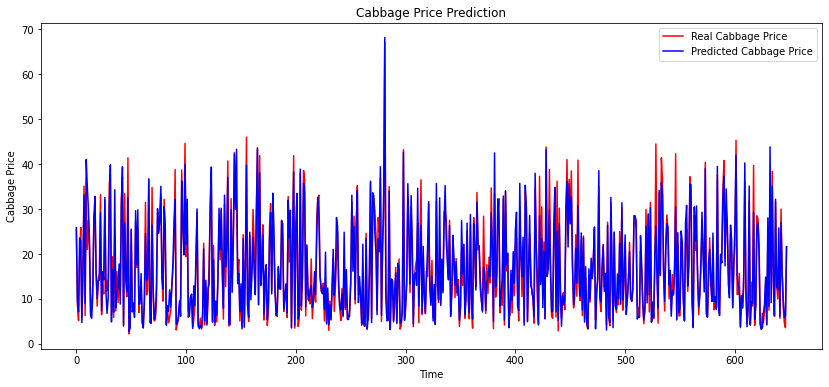

In [399]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_test, color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price, color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

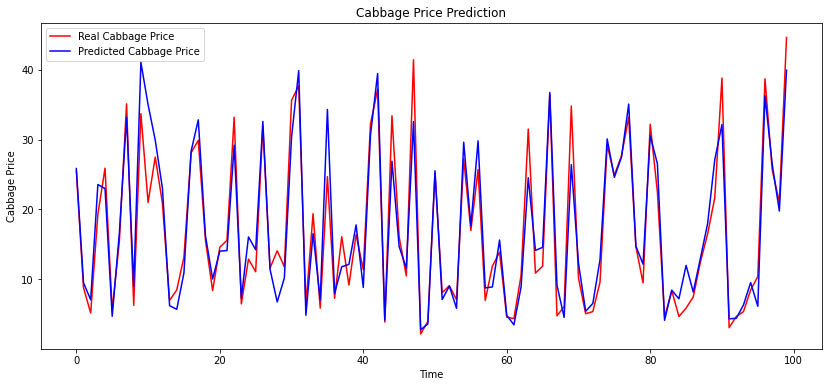

In [400]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_test[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price[0:100], color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

In [401]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 10.052961835009883 
RMSE value : 3.170640603255103 
R2 score value : 0.9130162072156992
